In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('./data/train.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.shape

(7613, 5)

In [5]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
train.isnull().mean().sort_values(ascending=True)

id          0.000000
text        0.000000
target      0.000000
keyword     0.008013
location    0.332720
dtype: float64

Here we can see we have very less nan values in keyword column so we can use the most occured keyword by frequency here

In [7]:
train.groupby(['keyword'])['keyword'].count()

keyword
ablaze                 36
accident               35
aftershock             34
airplane%20accident    35
ambulance              38
                       ..
wounded                37
wounds                 33
wreck                  37
wreckage               39
wrecked                39
Name: keyword, Length: 221, dtype: int64

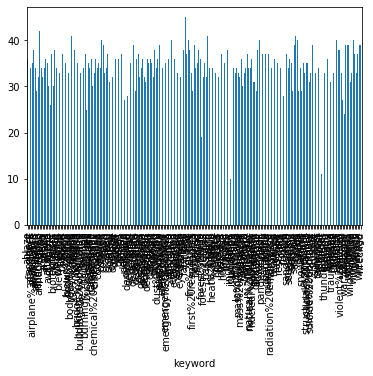

In [8]:
train.groupby(['keyword'])['keyword'].count().plot.bar()

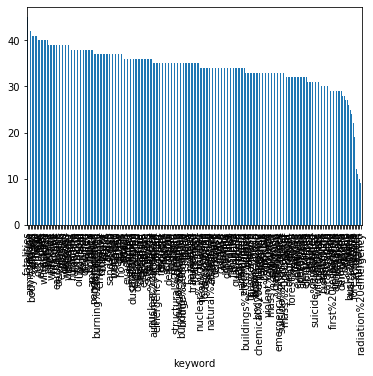

In [9]:
train.groupby(['keyword'])['keyword'].count().sort_values(ascending=False).plot.bar()

In [10]:
train['keyword'].value_counts().index[0]

'fatalities'

In [11]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [12]:
impute_nan(train,'keyword')

In [13]:
train.isnull().sum()

id             0
keyword        0
location    2533
text           0
target         0
dtype: int64

Now let us deal with the location column as it is having much large amount of nan value we cannot use simply frequent values directly

In [14]:
import numpy as np
# here i am capturing the importance of the nan values
train['location_Var']=np.where(train['location'].isnull(),1,0)

In [15]:
train.head()

,id,keyword,location,text,target,location_Var
0,1,fatalities,NaN,Our Deeds are the Reason of this #earthquake M...,1,1
1,4,fatalities,NaN,Forest fire near La Ronge Sask. Canada,1,1
2,5,fatalities,NaN,All residents asked to 'shelter in place' are ...,1,1
3,6,fatalities,NaN,"13,000 people receive #wildfires evacuation or...",1,1
4,7,fatalities,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1


In [16]:
# after finding the importance of nan values replace it with the most frequent ones
frequent=train['location'].mode()[0]
train['location'].fillna(frequent,inplace=True)

In [17]:
train.head()

,id,keyword,location,text,target,location_Var
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1,1
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1,1
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1,1
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1,1
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1,1


Let us do the same with the test set also since it is also having some nan values

Now since we have dealt with all of the nan value lets do some data preprocessing

In [24]:
X_train=train.drop('target',axis=1)
X_train.head()

,id,keyword,location,text,location_Var
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1


In [25]:
y_train=train['target']
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
tweets=train.copy()

In [28]:
tweets['text'][0:10]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

In [29]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [30]:
# Lowering the text
# Removing all the special characters and stop words
ps = PorterStemmer()
corpus = []
for i in range(0, len(tweets)):
    review = re.sub('[^a-zA-Z]', ' ', tweets['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
# have a look how our corpus looks like after cleaning our data
corpus[0:10]

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area']

In [35]:
from tensorflow.keras.preprocessing.text import one_hot
voc_size=5000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[381, 3020, 2422, 3379, 1879, 1553, 4301],
 [2190, 1901, 3534, 450, 767, 1651, 509],
 [4727, 284, 798, 2182, 2683, 2922, 4037, 798, 2182, 4629, 899],
 [3101, 1565, 517, 4037, 4629, 1522],
 [4752, 3894, 2993, 921, 3857, 3187, 517, 3964, 93],
 [4421, 3029, 1522, 4697, 3522, 2509, 672, 4455, 3295, 1901, 883, 517],
 [1047, 3007, 61, 448, 2422, 3290, 1047, 4329, 2413, 4711, 2265, 583],
 [2816, 2054, 4193, 1901, 215],
 [1500, 4037, 1519, 4682, 3487, 4329],
 [4723, 3104, 4845, 583],
 [3351, 3101, 3533, 483, 3777, 1330],
 [3809,
  3888,
  1154,
  3053,
  1047,
  559,
  1824,
  3238,
  3618,
  3888,
  1154,
  3655,
  3655,
  1495,
  1047],
 [448, 1047, 4003, 1181, 1154, 2035, 2927, 1386],
 [1047, 4861, 146, 213, 4861],
 [1227, 93, 1277, 2072, 3014, 299, 2261],
 [1395],
 [1637, 2879],
 [3502, 1637],
 [3014, 3455],
 [1206],
 [3371],
 [164, 4230],
 [1637, 4456],
 [4471, 2035],
 [360],
 [4351, 1476, 3593],
 [666, 4374, 3620],
 [1637, 2348],
 [4978],
 [3956, 2576],
 [2087],
 [4341, 4826, 953, 721, 

Embedding Representation

In [37]:
# Making the length of the vector same by adding the padding assuming the max sent length 20
from tensorflow.keras.preprocessing.sequence import pad_sequences
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1879 1553 4301]
 [   0    0    0 ...  767 1651  509]
 [   0    0    0 ... 2182 4629  899]
 ...
 [   0    0    0 ... 2557 1311 2006]
 [   0    0    0 ... 4666 3410 1748]
 [   0    0    0 ... 2557  710 4577]]


In [39]:
# Here we can see the sentenses are represented in the form of vectors of 20
embedded_docs[0:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  381, 3020, 2422, 3379, 1879, 1553, 4301],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 2190, 1901, 3534,  450,  767, 1651,  509],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 4727,  284,
         798, 2182, 2683, 2922, 4037,  798, 2182, 4629,  899],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 3101, 1565,  517, 4037, 4629, 1522],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        4752, 3894, 2993,  921, 3857, 3187,  517, 3964,   93],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4421, 3029, 1522,
        4697, 3522, 2509,  672, 4455, 3295, 1901,  883,  517],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1047, 3007,   61,
         448, 2422, 3290, 1047, 4329, 2413, 4711, 2265,  583],
       [   0,    0,    0,    0,    0,    

Buliding Model

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [41]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

W0912 11:15:41.532882 140161627096896 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0912 11:15:41.571876 140161627096896 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0912 11:15:41.874624 140161627096896 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrappe

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
len(embedded_docs),y_train.shape

(7613, (7613,))

In [45]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y_train)

In [46]:
X_final.shape,y_final.shape

((7613, 20), (7613,))

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

Training the Model

In [56]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=50)

Train on 5100 samples, validate on 2513 samples
Epoch 1/10
5100/5100 [==============================] - 4s 791us/sample - loss: 0.0279 - acc: 0.9927 - val_loss: 1.5790 - val_acc: 0.7159
Epoch 2/10
5100/5100 [==============================] - 3s 675us/sample - loss: 0.0275 - acc: 0.9916 - val_loss: 1.5202 - val_acc: 0.7246
Epoch 3/10
5100/5100 [==============================] - 4s 699us/sample - loss: 0.0254 - acc: 0.9916 - val_loss: 1.6759 - val_acc: 0.7175
Epoch 4/10
5100/5100 [==============================] - 3s 640us/sample - loss: 0.0202 - acc: 0.9937 - val_loss: 1.6514 - val_acc: 0.7211
Epoch 5/10
5100/5100 [==============================] - 3s 635us/sample - loss: 0.0221 - acc: 0.9929 - val_loss: 1.6834 - val_acc: 0.7115
Epoch 6/10
5100/5100 [==============================] - 3s 661us/sample - loss: 0.0221 - acc: 0.9929 - val_loss: 1.6133 - val_acc: 0.7159
Epoch 7/10
5100/5100 [==============================] - 4s 722us/sample - loss: 0.0210 - acc: 0.9937 - val_loss: 1.6244 - va

Let us try adding the dropout layer

In [50]:
# from tensorflow.keras.layers import Dropout
# ## Creating model
# embedding_vector_features=40
# model=Sequential()
# model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model.add(Dropout(0.3))
# model.add(LSTM(100))
# model.add(Dropout(0.3))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
# Performance Metrics
y_pred=model.predict_classes(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)



array([[1121,  325],
       [ 375,  692]])

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7214484679665738